## 匯入函式庫

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 透過raw.githubusercontent讀取最近一日世界各個地區新冠肺炎的資料

In [2]:
from datetime import datetime, timedelta

date = datetime.today()

while True:
    try:
        find = True
        print('Getting data of date:', date.strftime("%m-%d-%Y"))
        url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + str(date.strftime("%m-%d-%Y")) + '.csv'
        df = pd.read_csv(url)
    except:
        find = False
    if find:
        print('Found!')
        break
    else:
        print('No data of this date yet.')
        date = date - timedelta(days = 1)

date_of_df = date.strftime("%Y/%m/%d")

Getting data of date: 05-23-2020
No data of this date yet.
Getting data of date: 05-22-2020
Found!


## 查看資料集

In [3]:
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-23 02:32:42,34.223334,-82.461707,36,0,0,36,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-23 02:32:42,30.295065,-92.414197,289,15,0,274,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-23 02:32:42,37.767072,-75.632346,711,11,0,700,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-23 02:32:42,43.452658,-116.241552,794,23,0,771,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-23 02:32:42,41.330756,-94.471059,6,0,0,6,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3398,NaN,NaN,NaN,West Bank and Gaza,2020-05-23 02:32:42,31.952200,35.233200,423,2,346,75,West Bank and Gaza
3399,NaN,NaN,NaN,Western Sahara,2020-05-23 02:32:42,24.215500,-12.885800,6,0,6,0,Western Sahara
3400,NaN,NaN,NaN,Yemen,2020-05-23 02:32:42,15.552727,48.516388,209,33,11,165,Yemen
3401,NaN,NaN,NaN,Zambia,2020-05-23 02:32:42,-13.133897,27.849332,920,7,336,577,Zambia


## 查看資料集中各個變數的資料型態和其他相關的資訊

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3403 entries, 0 to 3402
Data columns (total 12 columns):
FIPS              2999 non-null float64
Admin2            3002 non-null object
Province_State    3225 non-null object
Country_Region    3403 non-null object
Last_Update       3403 non-null object
Lat               3334 non-null float64
Long_             3334 non-null float64
Confirmed         3403 non-null int64
Deaths            3403 non-null int64
Recovered         3403 non-null int64
Active            3403 non-null int64
Combined_Key      3403 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 319.2+ KB


## 透過長條圖分別展示出最近一日新冠肺炎確診、死亡、治癒人數世界前十多的國家

### 將資料集根據國家合併(原始的資料集可能一個國家會出現好幾個不同的省/州)

In [5]:
df_gbCountry = df.groupby('Country_Region').sum().drop(['Lat', 'Long_'] ,axis = 1)
df_gbCountry

,FIPS,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,
Afghanistan,0.0,9216,205,996,8015
Albania,0.0,981,31,777,173
Algeria,0.0,7918,582,4256,3080
Andorra,0.0,762,51,652,59
Angola,0.0,60,3,17,40
...,...,...,...,...,...
West Bank and Gaza,0.0,423,2,346,75
Western Sahara,0.0,6,0,6,0
Yemen,0.0,209,33,11,165


### 查看各個變數之間的相關矩陣

In [6]:
df_gbCountry.corr()

,FIPS,Confirmed,Deaths,Recovered,Active
FIPS,1.000000,0.911876,0.812600,0.688574,0.949827
Confirmed,0.911876,1.000000,0.933952,0.885009,0.980165
Deaths,0.812600,0.933952,1.000000,0.835232,0.898812
Recovered,0.688574,0.885009,0.835232,1.000000,0.776871
Active,0.949827,0.980165,0.898812,0.776871,1.000000


### 最近一日新冠肺炎「確診人數」世界前十多的國家

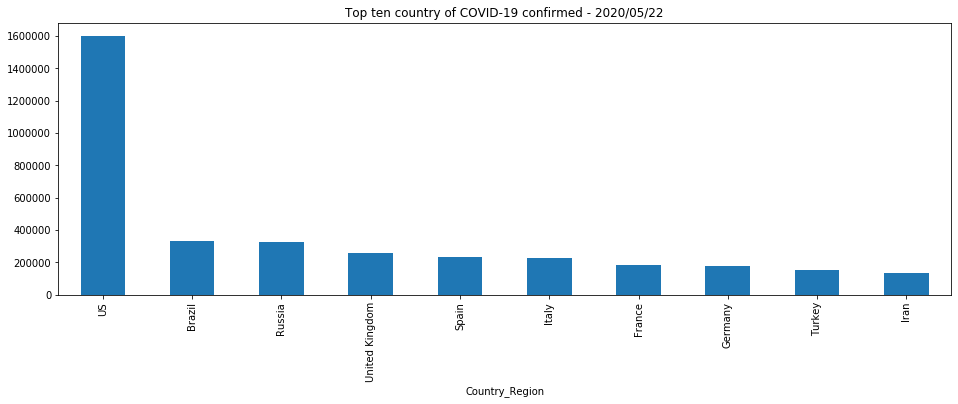

In [7]:
df_gbCountry['Confirmed'].sort_values(ascending = False)[0:10].plot.bar(
    title = 'Top ten country of COVID-19 confirmed - ' + date_of_df,
    figsize = (16, 5)
)

### 最近一日新冠肺炎「死亡人數」世界前十多的國家

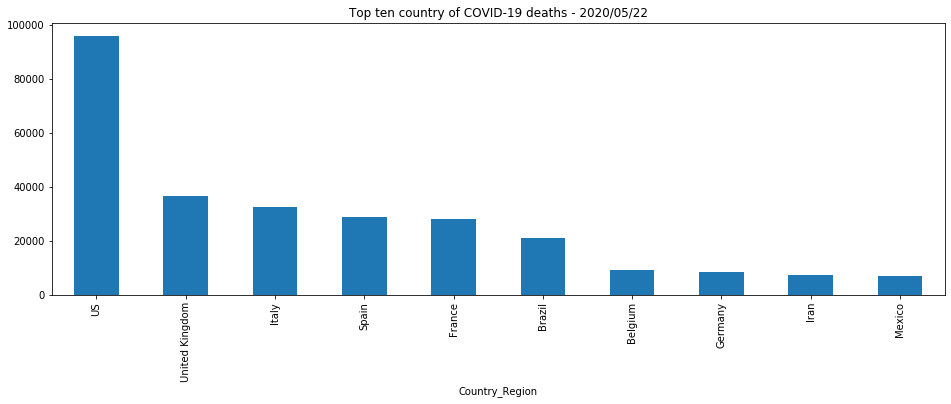

In [8]:
df_gbCountry['Deaths'].sort_values(ascending = False)[0:10].plot.bar(
    title = 'Top ten country of COVID-19 deaths - ' + date_of_df,
    figsize=(16,5)
)

### 最近一日新冠肺炎「治癒人數」世界前十多的國家

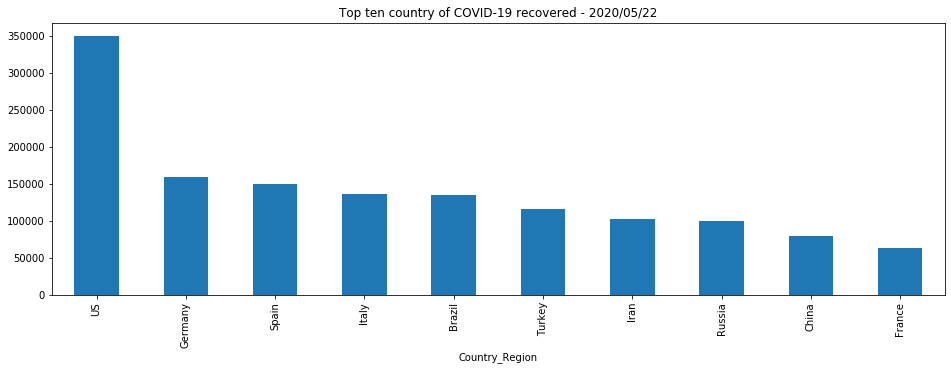

In [9]:
df_gbCountry['Recovered'].sort_values(ascending = False)[0:10].plot.bar(
    title = 'Top ten country of COVID-19 recovered - ' + date_of_df,
    figsize=(16,5)
)

## 用HeatMap呈現最近一日新冠肺炎世界確診人數的地圖

In [10]:
# 將經緯度有NaN的資料去除，不然程式會出現錯誤
df = df.dropna(subset=['Lat', 'Long_'])

import folium
from folium.plugins import HeatMap
mapa = folium.Map(location = (20, 20), zoom_start = 2, tiles = "Stamen Toner")
loc_li = [list(a) for a in zip(list(df.Lat), (df.Long_))]
loc_li_multByConfirm = []
for loc in loc_li:
    for i in range(df.loc[(df['Lat'] == loc[0]) & (df['Long_'] == loc[1]), 'Confirmed'].values[0]):
        loc_li_multByConfirm.append(loc)
HeatMap(loc_li, radius = 15).add_to(mapa)
mapa

可以透過世界地圖看出目前新冠肺炎的確診人數集中在北美和歐洲。

## 透過raw.githubusercontent讀取新冠肺炎時間序列的資料集

In [11]:
df_ts = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_ts

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,880,898,916,933,946,948,949,964,969,981
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,760,761,761,761,761,761,761,762,762,762
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,45,48,48,48,48,50,52,52,58,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,220,235,235,235,235,246,251,251,251,251
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,70,85,106,122,128,130,167,184,197,209
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,11,11,11,11,11,11,11,34,34,78
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,801,907,1118,1322,1524,1729,1936,2140,2350,2551


## 展示2020/3/21時世界前十多確診人數的國家過去兩個月來確診人數的走勢

### 將資料集根據國家合併(原始的資料集可能一個國家會出現好幾個不同的省/州)

In [12]:
df_ts_gbCountry = df_ts.drop(['Lat', 'Long'], axis = 1)
df_ts_gbCountry = df_ts_gbCountry.groupby("Country/Region").sum()
df_ts_gbCountry.index.name = None
#df_ts_gbCountry = df_ts_gbCountry.T
df_ts_gbCountry

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216
Albania,0,0,0,0,0,0,0,0,0,0,...,880,898,916,933,946,948,949,964,969,981
Algeria,0,0,0,0,0,0,0,0,0,0,...,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918
Andorra,0,0,0,0,0,0,0,0,0,0,...,760,761,761,761,761,761,761,762,762,762
Angola,0,0,0,0,0,0,0,0,0,0,...,45,48,48,48,48,50,52,52,58,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,375,375,375,376,381,388,391,398,423,423
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,70,85,106,122,128,130,167,184,197,209
Zambia,0,0,0,0,0,0,0,0,0,0,...,446,654,654,679,753,761,772,832,866,920


### 只取最近一日新冠肺炎確診人數世界前十多的國家的資料

In [13]:
top_ten_country_index = df_gbCountry['Confirmed'].sort_values(ascending = False)[0:10].index
df_ts_gbCountry_top_ten = df_ts_gbCountry.loc[top_ten_country_index]
df_ts_gbCountry_top_ten

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
Country_Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,1390406,1417774,1442824,1467820,1486757,1508308,1528568,1551853,1577147,1600937
Brazil,0,0,0,0,0,0,0,0,0,0,...,190137,203165,220291,233511,241080,255368,271885,291579,310087,330890
Russia,0,0,0,0,0,0,0,0,0,2,...,242271,252245,262843,272043,281752,290678,299941,308705,317554,326448
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,230985,234440,238004,241461,244995,247709,250138,249619,252246,255544
Spain,0,0,0,0,0,0,0,0,0,0,...,228691,229540,230183,230698,230698,231606,232037,232555,233037,234824
Italy,0,0,0,0,0,0,0,0,0,2,...,222104,223096,223885,224760,225435,225886,226699,227364,228006,228658
France,0,0,2,3,3,3,4,5,5,5,...,178184,178994,179630,179630,179693,180051,180933,181700,181951,182015
Germany,0,0,0,0,0,1,4,4,4,5,...,174098,174478,175233,175752,176369,176551,177778,178473,179021,179710
Turkey,0,0,0,0,0,0,0,0,0,0,...,143114,144749,146457,148067,149435,150593,151615,152587,153548,154500


### 展示最近一日新冠肺炎確診人數世界前十多的國家過去兩個月來確診人數的走勢

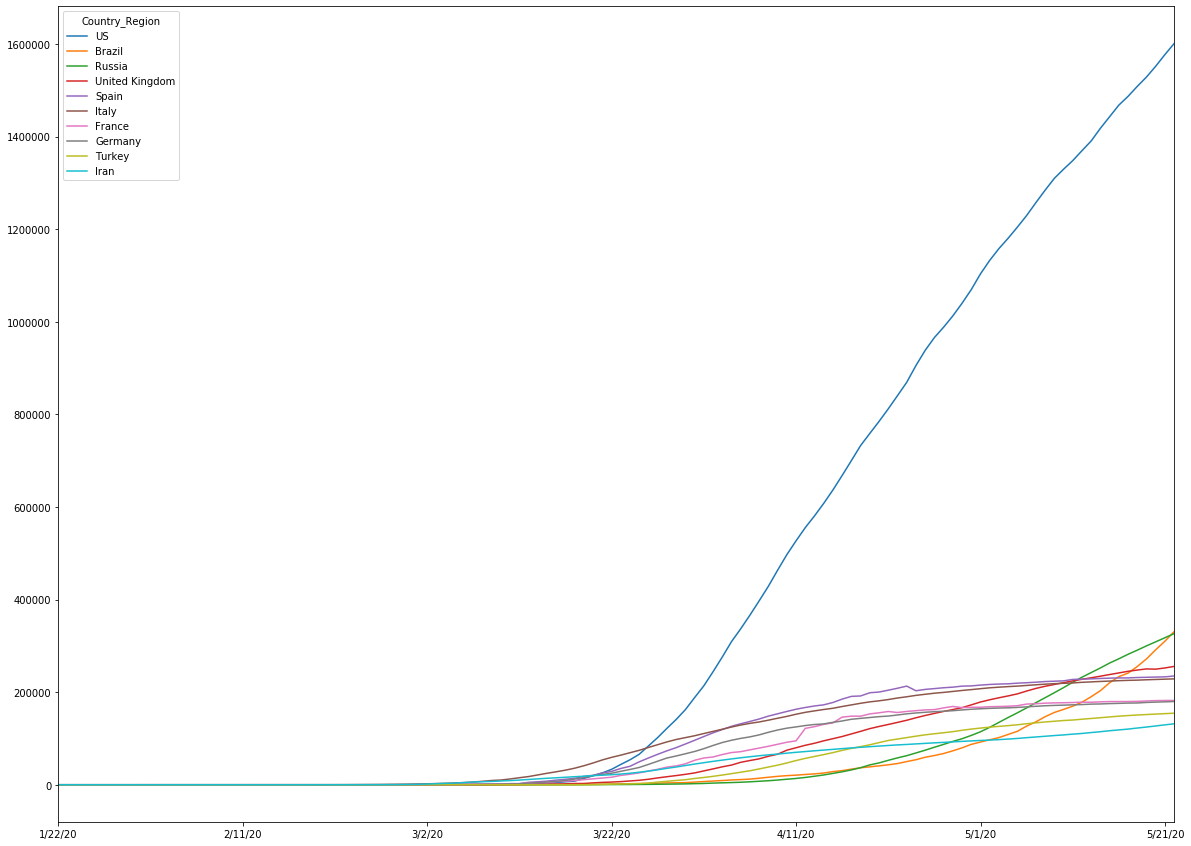

In [14]:
df_ts_gbCountry_top_ten.T.plot(figsize=(20, 15))

近期身為世界老大哥的美國在新冠肺炎的確診人數上也是一枝獨秀呢(笑)！但其他國家有沒有隱匿疫情就不得而知了。

## 透過簡單線性迴歸預測未來全球的確診人數

### 求出全球每日的確診人數

In [15]:
df_ts_gbCountry.T.sum(axis = 1)

1/22/20        555
1/23/20        654
1/24/20        941
1/25/20       1434
1/26/20       2118
            ...   
5/18/20    4801943
5/19/20    4897492
5/20/20    4996472
5/21/20    5102424
5/22/20    5210817
Length: 122, dtype: int64

### 畫出全球每日的確診人數的走勢圖

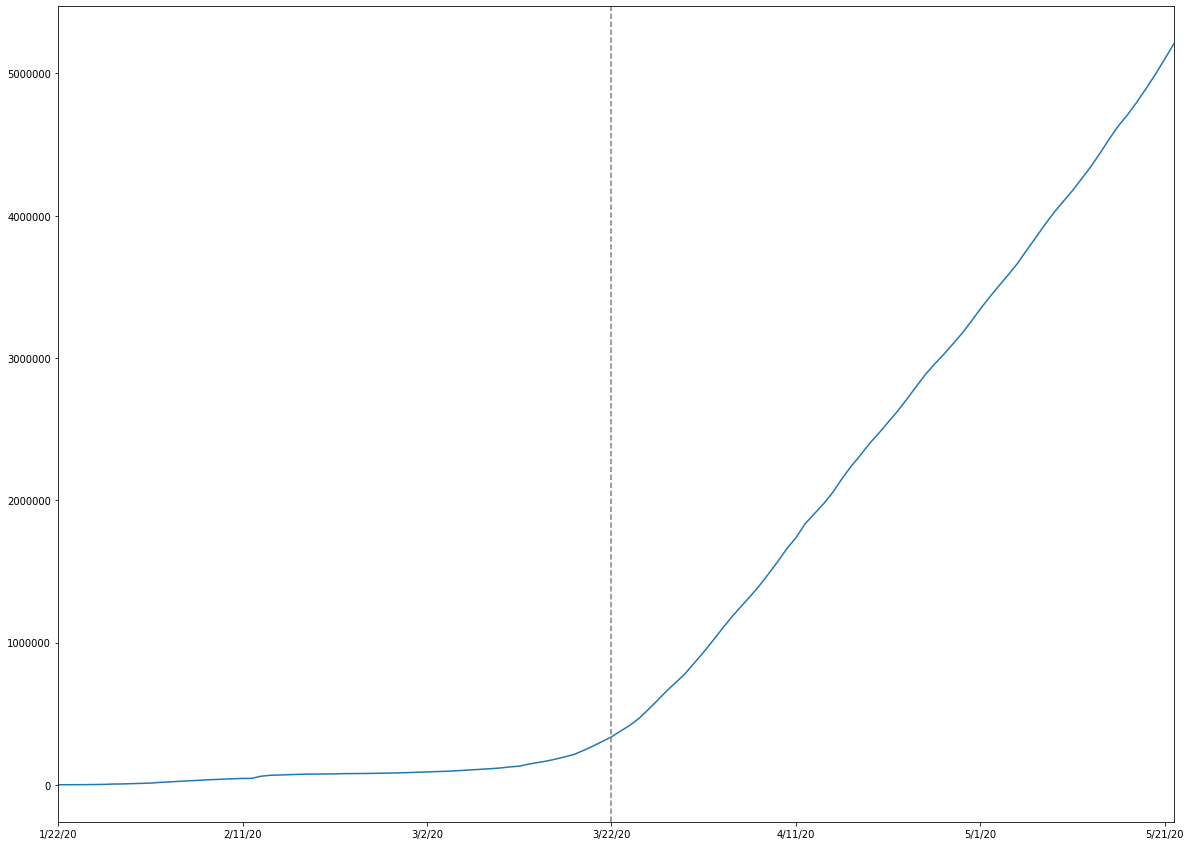

In [16]:
df_ts_gbCountry.T.sum(axis = 1).plot(figsize=(20, 15))
plt.axvline(x = 60, color = 'gray', linestyle = '--')

從圖片可以看出全球每日新冠肺炎的確診人數呈現逐漸升高的趨勢，其中從前兩個月開始(虛線右邊處)到現在的上升趨勢呈現穩定的線性走勢，因此適合用簡單線性迴歸模型預測未來的確診人數。

 ### 根據全球每日的確診人數建立簡單線性迴歸模型

In [17]:
most_recent_how_many_days = 60
coded_time_most_recent_date = len(df_ts_gbCountry.T.sum(axis = 1)[-most_recent_how_many_days:])
coded_time_list = list(range(1, coded_time_most_recent_date + 1))

In [18]:
X_train = np.asarray(coded_time_list).reshape(-1, 1)
y_train = df_ts_gbCountry.T.sum(axis = 1)[-most_recent_how_many_days:]

In [19]:
from sklearn.linear_model import LinearRegression
linearRegModel = LinearRegression()
linearRegModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
import statsmodels.api as sm
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.366e+04
Date:                Sat, 23 May 2020   Prob (F-statistic):                    2.27e-86
Time:                        14:26:50   Log-Likelihood:                         -782.47
No. Observations:                  60   AIC:                                      1567.
Df Residuals:                      59   BIC:                                      1569.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.651e+04    414.033    208.949      0.000    8.57e+04    8.73e+04
==============================================================================
Omnibus:                        7.764   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.682
Skew:                           0.875   Prob(JB):                       0.0215
Kurtosis:                       3.093   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
print('comfirmed = ')
print('', linearRegModel.intercept_, '+', linearRegModel.coef_[0], '* coded_time')

comfirmed = 
 210580.76553672273 + 81290.77763267576 * coded_time


### 展示預測結果

#### 預測未來一天全球新冠肺炎的確診人數

In [22]:
predict_f1 = float(linearRegModel.intercept_ + linearRegModel.coef_ * (coded_time_most_recent_date + 1))
predict_f1

5169318.201129944

#### 預測未來七天全球新冠肺炎的確診人數

In [23]:
predict_f7 = float(linearRegModel.intercept_ + linearRegModel.coef_ * (coded_time_most_recent_date + 7))
predict_f7

5657062.866925999